# Pymaceuticals Inc.
---

### My Analysis
Review all the figures and tables and write at least three observations from the data. 

1. Bar plot shows Capomulin and close-by Ramicane were the most administered drugs. Propriva is the least given regimen over course of the study. 
2. Pie plot shows the ratio of Males to females is nearly equal, meaning the study enrolled a fair distribution of the patient population. 
3. Boxplot shows Capomulin and Ramicane were most effective at reducing the tumor size based on tumor volume obtained at the greatest(last) timepoints for each of the four drugs. The only outlier is found around 36 (mm3) under Infubinol. 
4. Line plot of Mouse “b128” shows as the number of days on Capomulin treatment increased, the tumor volume decreased, as expected. 
5. The correlation between mouse weight and average tumor volume is 0.84 which is a strong correlation. As the mouse weight increases, so does the average tumor volume. 
6. Linear regression analysis shows a positive slope indicating that as the mouse weight increases, average tumor volume also increases. Most of the data points fit nicely along the line.  
7. Overall, Capomulin performed very well against the other treatment regimens. 
 

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [32]:
# Checking the number of mice.
number_of_mice = mouse_data_complete["Mouse ID"].nunique()
number_of_mice

249

In [33]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data_complete[mouse_data_complete.duplicated()]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [34]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data_complete[mouse_data_complete["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [35]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data_complete = mouse_data_complete[mouse_data_complete["Mouse ID"] != "g989"]
clean_mouse_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [36]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = clean_mouse_data_complete["Mouse ID"].nunique()
number_of_mice

248

## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = clean_mouse_data_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median = clean_mouse_data_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance = clean_mouse_data_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
standard_deviation = clean_mouse_data_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
SEM = clean_mouse_data_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats_df = pd.DataFrame({
    "Tumor_Volume : mean": mean,
    "median":median,	
    "var":variance,	
    "std":standard_deviation,	
    "sem":SEM})

#Call the dataframe
summary_stats_df


,Tumor_Volume : mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [38]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
OBJ = clean_mouse_data_complete.groupby("Drug Regimen")

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_aggregation_df = OBJ.agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summary_stats_aggregation_df                          

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [39]:
## Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen.
mouse_counts = clean_mouse_data_complete["Drug Regimen"].value_counts()
mouse_counts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

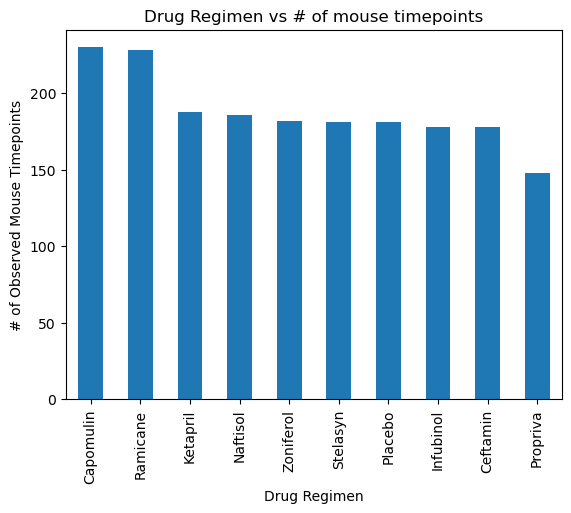

In [40]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen -using Pandas.
mouse_counts = clean_mouse_data_complete["Drug Regimen"].value_counts()
mouse_counts.plot(kind="bar", ylabel="# of Observed Mouse Timepoints")
plt.title("Drug Regimen vs # of mouse timepoints")
plt.show()

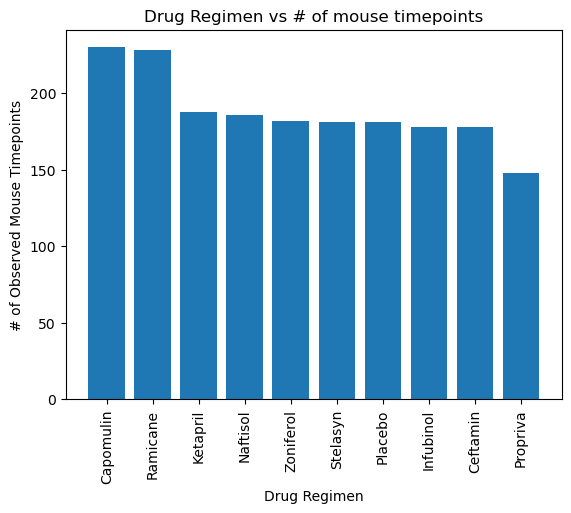

In [41]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen -using pyplot.
##(x_index, y_values)
plt.bar(mouse_counts.index,mouse_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Drug Regimen vs # of mouse timepoints")
plt.show()

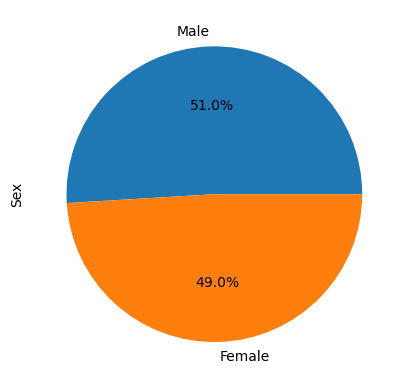

In [42]:
# Generate a pie plot showing the distribution of female versus male mice -using Pandas
sex_counts = clean_mouse_data_complete["Sex"].value_counts()
sex_counts.plot.pie(autopct="%1.1f%%", ylabel="Sex")
plt.show()

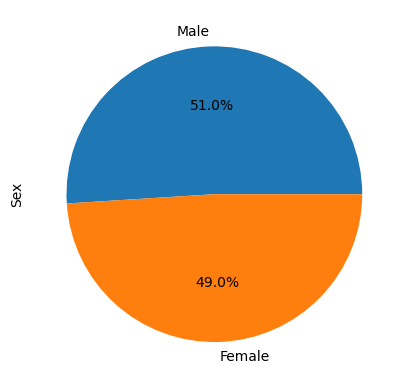

In [43]:
# Generate a pie plot showing the distribution of female versus male mice -using pyplot
labels = ["Male", "Female"]
sizes = [51.0, 49.0]
plt.pie( sizes, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse. (##Add .reset_index to number rows starting with 0.) 
greatest_timepoint = clean_mouse_data_complete.groupby(["Mouse ID"])["Timepoint"].max().reset_index()
greatest_timepoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [45]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumorvolume_df = greatest_timepoint.merge(clean_mouse_data_complete, how="left", on= ['Mouse ID', 'Timepoint'])
last_tumorvolume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [46]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_voldata_list = []

# Locate the rows which contain mice on each drug and get the tumor volumes:  
## -> Loop through each drug in the treatment list, locate rows in the merged DataFrame that correspond to each treatment. DONE
# Calculate the IQR and quantitatively determine if there are any potential outliers: 
## -> Set up a "for" loop to display the interquartile range (IQR) and the outliers for each treatment group. DONE
# Append the resulting final tumor volumes for each drug to the empty list. DONE
# Determine outliers by using the upper and lower bounds, and then print the results. DONE

for drug in treatments: 
    tumor_volumes_data= last_tumorvolume_df.loc[last_tumorvolume_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_voldata_list.append(tumor_volumes_data)
    
    quartiles = tumor_volumes_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"{drug}: Values below {lower_bound} could be outliers.")
    print(f"{drug}: Values above {upper_bound} could be outliers.")
    ##print(f"Values above {round(upper_bound,3)} could be outliers.")
    
    outliers = tumor_volumes_data.loc[(tumor_volumes_data < lower_bound) | (tumor_volumes_data > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")
    print(f"------------------------------------------------------------------------------------")


The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
Capomulin: Values below 20.70456164999999 could be outliers.
Capomulin: Values above 51.83201549 could be outliers.
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
------------------------------------------------------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
Ramicane: Values below 17.912664470000003 could be outliers.
Ramicane: Values above 54.30681135 could be outliers.
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
------------------------------------------------------------------------------------
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of I

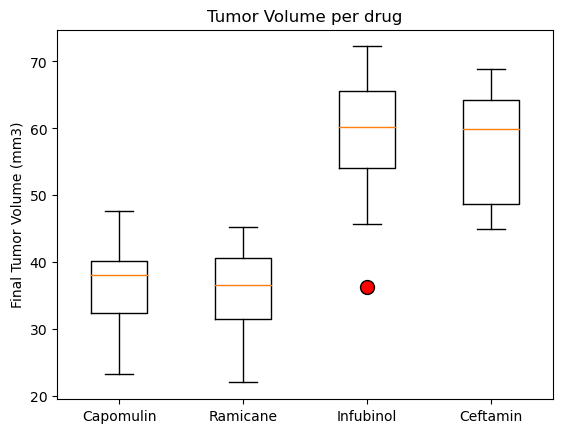

In [47]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
## -> Go back to our empty list that's populated with Tumor Vol data. 

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume per drug')
ax1.set_ylabel('Final Tumor Volume (mm3)')
# Set outliers (fliers) properties, e.g. marker symbol, color and size.
outlierDot = dict(marker = "o",markerfacecolor = "red", markersize=10)
ax1.boxplot(tumor_voldata_list, showmeans=False, flierprops = outlierDot) # =True adds green triangle to show mean.
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()


## Line and Scatter Plots

In [48]:
# Choose a single mouse treated with Capomulin
single_mouse = clean_mouse_data_complete[clean_mouse_data_complete["Mouse ID"] == "b128"]
single_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22
1268,b128,25,43.262145,1,Capomulin,Female,9,22
1400,b128,30,40.605335,1,Capomulin,Female,9,22
1547,b128,35,37.967644,1,Capomulin,Female,9,22
1629,b128,40,38.379726,2,Capomulin,Female,9,22
1764,b128,45,38.982878,2,Capomulin,Female,9,22


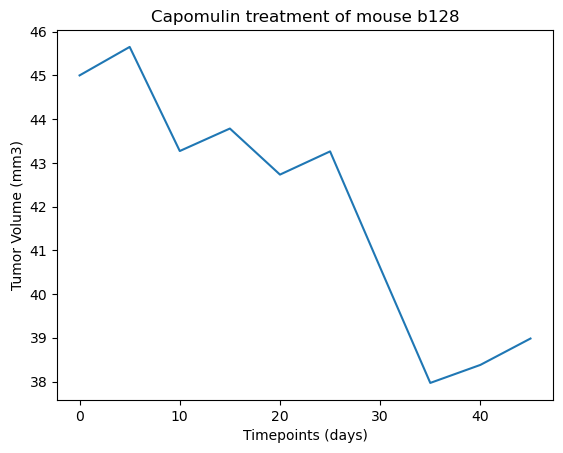

In [49]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin.
#plt.plot(x_values, y_values)

plt.plot(single_mouse["Timepoint"], single_mouse["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse b128")
plt.xlabel("Timepoints (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


In [50]:
## Scatter plot for Capomulin
scatter_data = clean_mouse_data_complete.loc[clean_mouse_data_complete["Drug Regimen"] == "Capomulin"]
scatter_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [51]:
## Get average of tumor volume and weight of each mouse.
average = scatter_data.groupby(['Mouse ID']).agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"})
average

,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22.0
b742,40.083699,21.0
f966,36.505973,17.0
g288,41.990097,19.0
g316,44.613344,22.0
i557,44.805810,24.0
i738,39.141053,20.0
j119,44.465236,23.0
j246,43.216925,21.0


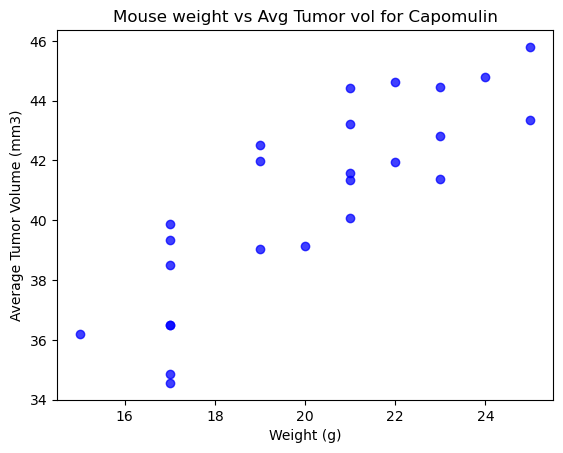

In [52]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_data = clean_mouse_data_complete.loc[clean_mouse_data_complete["Drug Regimen"] == "Capomulin"]
average = scatter_data.groupby(['Mouse ID']).agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"})

x_axis = average["Weight (g)"]
y_axis= average["Tumor Volume (mm3)"]

plt.scatter(x_axis, y_axis, marker="o", facecolors = "blue", alpha=0.75)
plt.title("Mouse weight vs Avg Tumor vol for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [53]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen.

## Start with correlation coefficient
x_axis = average["Weight (g)"]
y_axis = average["Tumor Volume (mm3)"]

correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume is 0.84


In [54]:
## Get lingress. Import linregress from scipy atop to run this function.
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
linregress(x_axis, y_axis)

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

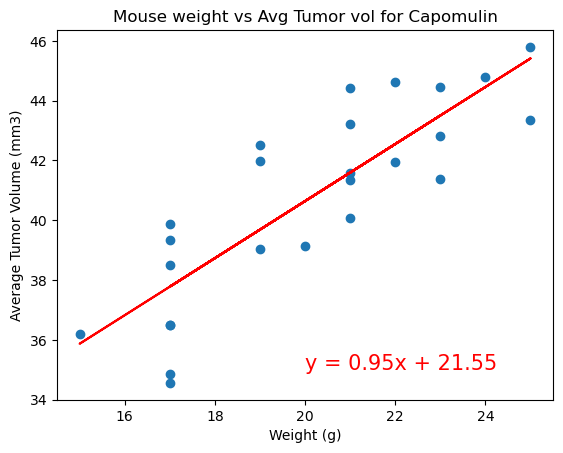

In [55]:
# Add the linear regression equation and line to plot

x_axis = average["Weight (g)"]
y_axis = average["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")   #Make sizes bigger if equation does not show up initially. 
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse weight vs Avg Tumor vol for Capomulin")
plt.show()

In [56]:
###FINISHED!###